In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as graph

In [2]:
cancer = load_breast_cancer()
trainX, testX = train_test_split(cancer.data) 
trainY, testY = train_test_split(cancer.target)

 #### Default parameter in K Nearest Neighbors (k=5)
    KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [3]:
clf = KNeighborsClassifier()
clf.fit(trainX,trainY)
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

Accuracy of training data : 0.70188
Accuracy of testing data : 0.52448


<h4 align = center> Change the n_neighbors parameter and random state in split</h4>

In [4]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(trainX,trainY)
print('K = 10 and No random_state in split')
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

K = 10 and No random_state in split
Accuracy of training data : 0.67606
Accuracy of testing data : 0.50350


In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(trainX,trainY)
print('K = 2 and No random_state in split')
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

K = 2 and No random_state in split
Accuracy of training data : 0.79108
Accuracy of testing data : 0.45455


In [6]:
trainX, testX = train_test_split(cancer.data, random_state=30) 
trainY, testY = train_test_split(cancer.target, random_state=30)

In [7]:
clf = KNeighborsClassifier()
clf.fit(trainX,trainY)
print('K = 5 and random_state in split = 30')
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

K = 5 and random_state in split = 30
Accuracy of training data : 0.94601
Accuracy of testing data : 0.92308


In [8]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(trainX,trainY)
print('K = 2 and random_state in split = 30')
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

K = 2 and random_state in split = 30
Accuracy of training data : 0.96948
Accuracy of testing data : 0.92308


In [9]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(trainX,trainY)
print('K = 10 and random_state in split = 30')
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

K = 10 and random_state in split = 30
Accuracy of training data : 0.94601
Accuracy of testing data : 0.93706


In [10]:
clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(trainX,trainY)
print('K = 50 and random_state in split = 30')
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

K = 50 and random_state in split = 30
Accuracy of training data : 0.91784
Accuracy of testing data : 0.90909


In [11]:
trainX, testX = train_test_split(cancer.data, random_state=60) 
trainY, testY = train_test_split(cancer.target, random_state=60)

In [12]:
clf = KNeighborsClassifier()
clf.fit(trainX,trainY)
print('K = 5 and random_state in split = 60')
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

K = 5 and random_state in split = 60
Accuracy of training data : 0.93662
Accuracy of testing data : 0.95804


In [13]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(trainX,trainY)
print('K = 10 and random_state in split = 60')
print('Accuracy of training data : {:.5f}'.format(clf.score(trainX,trainY)))
print('Accuracy of testing data : {:.5f}'.format(clf.score(testX,testY)))

K = 10 and random_state in split = 60
Accuracy of training data : 0.92723
Accuracy of testing data : 0.96503


<h4>Find out all scores for k = 1 to 50 when random state = 30, then compare the difference between training scores and testing score for find out the perfecr neightbor </h4>

Best neighbor for prediction :  43
Difference between training and testing score : 0.0018


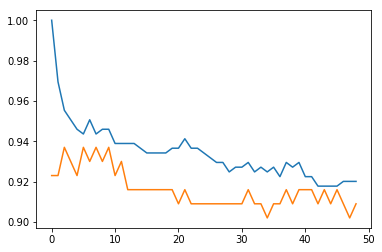

In [14]:
trainX, testX = train_test_split(cancer.data, random_state=30) 
trainY, testY = train_test_split(cancer.target, random_state=30)

training_scores = []
testing_scores = []

for k in range(1,50,1):
	clf = KNeighborsClassifier(n_neighbors=k)
	clf.fit(trainX,trainY)
	training_scores.append(clf.score(trainX,trainY))
	testing_scores.append(clf.score(testX,testY))



def getPerfectK(training_scores, testing_scores):
	min_dif = 1
	k = 1
	for i in range(1,len(training_scores),1):
		dif = training_scores[i] - testing_scores[i]
		if(dif < min_dif):
			min_dif = dif
			k = i

	return k, min_dif

perfect_k, dif = getPerfectK(training_scores, testing_scores)

print('Best neighbor for prediction : ',perfect_k)
print('Difference between training and testing score : {:.4f}'.format(dif))

graph.plot(training_scores)
graph.plot(testing_scores)
graph.show()